<a href="https://colab.research.google.com/github/team0243/multivariate/blob/main/Chapter_4_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimension Scaling คือ การลดขนาดของตัวเเปร จากที่มีเยอะให้เหลือน้อยๆ

## Example on Iris dataset

In [12]:
import pandas as pd

In [13]:
example_df = pd.read_csv(
    'https://raw.github.com/pandas-dev/'
    'pandas/master/pandas/tests/io/data/csv/iris.csv'
)
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**ลอง plot PCA เพื่อเปรียบเทียบกับ วิธี MDS**

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2) # เอาเเค่สองเเกนหลัก

In [16]:
new_pca = pca.fit_transform(example_df.iloc[:,:-1])

In [17]:
from matplotlib import pyplot as plt

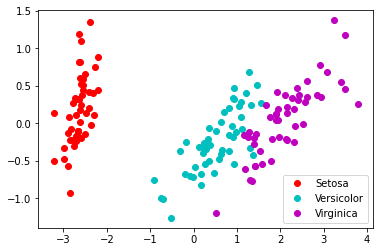

In [18]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'or',label='Setosa')  # พร็อตเเบ่งสามพันธุ์
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'oc',label='Versicolor') 
plt.plot(new_pca[100:,0],new_pca[100:,1],'om',label='Virginica')
plt.legend()

## MDS(Multidimensional Scaling)

Distance คือ ระยะห่างระหว่างจุด

In [19]:
X1 = example_df.iloc[0,:-1].to_numpy() # เอาตั้งเเต่จุดที่หนึ่งยกเว้นชื่อมัน
X1

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [20]:
X2 = example_df.iloc[1,:-1].to_numpy() # เอาตั้งเเต่จุดที่ 2 ยกเว้นชื่อมัน
X2

array([4.9, 3.0, 1.4, 0.2], dtype=object)

In [21]:
import numpy as np

In [22]:
dist = np.linalg.norm(X1-X2) # ระยะห่างระหว่างจุดที่ 1 กับ 2
dist

0.5385164807134502

In [23]:
(0.04 + 0.25)**(0.5) # sqrt การยกกำลัง 0.5

0.5385164807134504

## Distance Matrix คือ เเสดงถึงระยะห่างของเเต่ละจุด

In [24]:
from sklearn.metrics import pairwise_distances
dis_matrix = pairwise_distances(example_df.iloc[:,:-1])
dis_matrix
# 0.53851648 ระยะห่างระหว่างจุด 1 กับ จุด 2

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

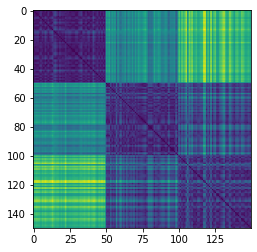

In [25]:
plt.imshow(dis_matrix) # เเต่ละจุดในmatrix มาพร็อตเป็นสี ยิ่งค่ามาก สีสว่าง ยิ่งค่าน้อย(พันธุ์เดียวกัน) สีเข้ม

#ทำ MDS

In [26]:
from sklearn.manifold import MDS # อยู่ในโฟลเดอร์ย่อย

In [27]:
mds = MDS(n_components=2)

In [28]:
new_mds = mds.fit_transform(example_df.iloc[:,:-1])

In [29]:
new_mds

array([[ 2.23648357, -1.54249045],
       [ 2.51264296, -1.07950589],
       [ 2.63493804, -1.23010564],
       [ 2.59640444, -0.98020876],
       [ 2.26641044, -1.58959004],
       [ 1.65617098, -1.75737522],
       [ 2.5620565 , -1.27386219],
       [ 2.25562494, -1.3761533 ],
       [ 2.83303639, -0.83310295],
       [ 2.43602712, -1.13148383],
       [ 1.90959947, -1.76408446],
       [ 2.30927583, -1.24371621],
       [ 2.59970489, -1.06508545],
       [ 3.10049419, -1.05803341],
       [ 1.77285486, -2.32338447],
       [ 1.4624476 , -2.34557302],
       [ 1.92384164, -1.98980401],
       [ 2.20303886, -1.52882543],
       [ 1.52313298, -1.82786798],
       [ 2.04527854, -1.70706497],
       [ 1.85167114, -1.43811833],
       [ 2.0404179 , -1.61139295],
       [ 2.79943609, -1.66375958],
       [ 1.9861424 , -1.17603074],
       [ 2.12057652, -1.02467348],
       [ 2.31421662, -0.99422378],
       [ 2.12148601, -1.28367674],
       [ 2.10673505, -1.5239643 ],
       [ 2.20464663,

**สนใจว่าจุดไหนห่างจากจุดไหนมากที่สุด**

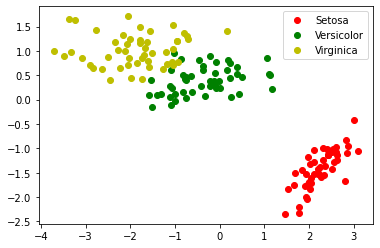

In [30]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')  # พร็อตเเบ่งสามพันธุ์
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor') 
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.legend()

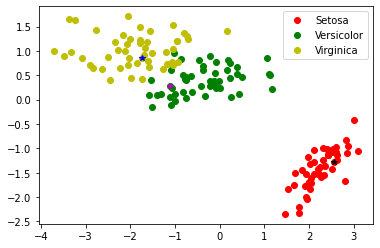

In [31]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')  # พร็อตเเบ่งสามพันธุ์
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor') 
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.plot(new_mds[6,0],new_mds[6,1],'*k') # สุ่มจุด
plt.plot(new_mds[56,0],new_mds[56,1],'*m')  # m คือ สีม่วง
plt.plot(new_mds[116,0],new_mds[116,1],'*b')
plt.legend()  

## การใช้ Pre-computed Distance Matrix

In [32]:
dis_matrix = pairwise_distances(example_df.iloc[:,:-1],metric = 'cityblock') ## 'cityblock'

In [33]:
mds2 = MDS(n_components=2,dissimilarity ='precomputed')

In [34]:
new_mds2 = mds.fit_transform(dis_matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


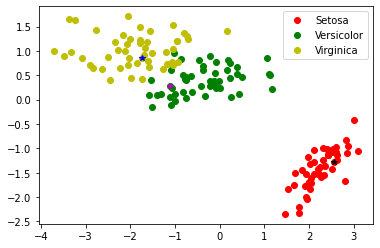

In [35]:
plt.plot(new_mds[:50,0],new_mds[:50,1],'or',label='Setosa')  # พร็อตเเบ่งสามพันธุ์
plt.plot(new_mds[50:100,0],new_mds[50:100,1],'og',label='Versicolor') 
plt.plot(new_mds[100:,0],new_mds[100:,1],'oy',label='Virginica')
plt.plot(new_mds[6,0],new_mds[6,1],'*k') # สุ่มจุด
plt.plot(new_mds[56,0],new_mds[56,1],'*m')  # m คือ สีม่วง
plt.plot(new_mds[116,0],new_mds[116,1],'*b')
plt.legend() 

##EX 2

https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # seaborn ไว้สำหรับวาดกราฟที่สวยงามได้มากกว่า matplotlib
import numpy as np

In [37]:
def make_hello(N=1000, rseed=42): # N = จำนวนจุด
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

In [38]:
X = make_hello(1000)

In [39]:
X.shape # ดูขนาดของ X 1000 จุด 2 คือ จุด x กับ y

(1000, 2)

*ไม่ใส่สี*

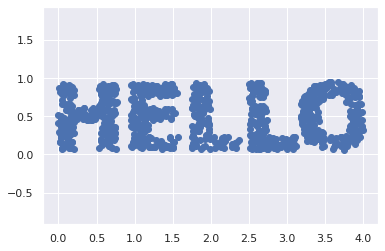

In [40]:
plt.scatter(X[:,0],X[:,1])
plt.axis('equal');    # plt.axis ทำให้สเกลของเเต่ละเเกนเท่ากัน

## เรีกกดูฟังก์ชั่น เเละ พลอตสี

In [41]:
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5)) # c คือ ค่าในเเนวเเกน X

In [42]:
colorize # ดูขนาดของdictionary

{'c': array([4.65390215e-05, 5.38772018e-04, 2.61356305e-03, 5.41450286e-03,
        1.74530786e-02, 2.02463354e-02, 2.20884685e-02, 2.55434869e-02,
        2.75118489e-02, 2.78085221e-02, 3.32797689e-02, 3.61538763e-02,
        3.73264793e-02, 3.96952845e-02, 4.11379837e-02, 4.32443345e-02,
        4.52101464e-02, 4.54145791e-02, 4.64821596e-02, 4.68264429e-02,
        4.84830986e-02, 4.96161451e-02, 5.20076940e-02, 5.23778264e-02,
        5.47296590e-02, 5.75739545e-02, 5.87735546e-02, 6.18264661e-02,
        7.02094535e-02, 7.24407353e-02, 7.35627062e-02, 7.64643777e-02,
        7.65794720e-02, 7.67691073e-02, 7.88421510e-02, 8.02847911e-02,
        8.37364713e-02, 8.72935871e-02, 8.84942061e-02, 8.97035566e-02,
        9.45543442e-02, 9.48310146e-02, 9.67670556e-02, 9.98866485e-02,
        1.01545423e-01, 1.01676507e-01, 1.02568263e-01, 1.02758579e-01,
        1.03247628e-01, 1.06045242e-01, 1.08383970e-01, 1.14609710e-01,
        1.21854745e-01, 1.23823164e-01, 1.24596371e-01, 1.2

In [43]:
colorize['c'].shape # c = 1000 ตัว

(1000,)

In [44]:
colorize['cmap'] # cmap คือ เรนโบว์

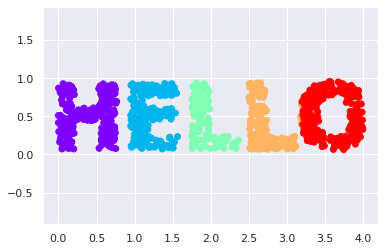

In [45]:
plt.scatter(X[:, 0], X[:, 1], **colorize) # เเบบใส่สีเเล้ว
plt.axis('equal');

## หมุน data

In [46]:
def rotate(X, angle): # ใส่ data 
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

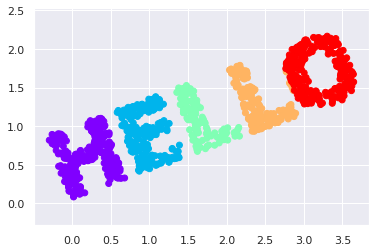

In [47]:
X2 = rotate(X, 20)  # หมุนในมุมกี่องศา หมุนใน 20 องศา
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

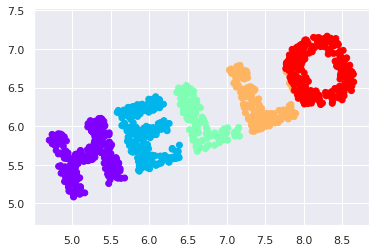

In [48]:
X2 = rotate(X, 20) + 5 # เลื่อนไปเเนวเเกน x เเละ y 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

## MDS

In [49]:
from sklearn.metrics import pairwise_distances # ดูระยะห่างของจุดเเต่ละจุด
D = pairwise_distances(X)
D.shape

(1000, 1000)

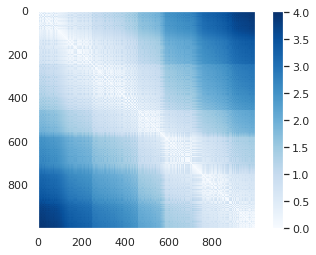

In [50]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar(); # บอกถึงสเกลทั้งหมดเป็นอย่างไร ยิ่งสีขาว เข้าใกล้ 0 ยิ่งสีเข้มเข้าใกล้ 4 สีน้ำเงินเข้ม คือ จุดที่ 1 เทียบกับจุดที่ 1000 เเปลว่าห่างกันประมาณ 4.0  

In [51]:
D2 = pairwise_distances(X2)

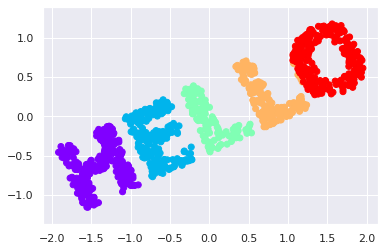

In [52]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1) # random_state สามารถฟิกได้ว่าตัวเเรกที่มาพร็อตคือตัวไหน ทำให้เหมือนกัน
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

* random_state
* zorder in plt.imshow 
* np.allclose()

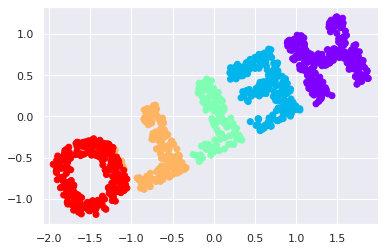

In [53]:
model = MDS(n_components=2, dissimilarity='precomputed') 
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

### ทดลองทำ PCA กับ ข้อมูล ```X``` เเล้ว plotgraph
### เเละดูผลว่าการกระจายของข้อมูลเปลี่ยนไปหรือไม่ อย่างไร
ส่งก่อน 14.15 commit ว่า quiz 4 

In [54]:
from sklearn.decomposition import PCA

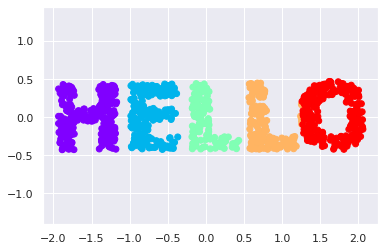

In [55]:
model = PCA(n_components=2 ) 
out = model.fit_transform(X2)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

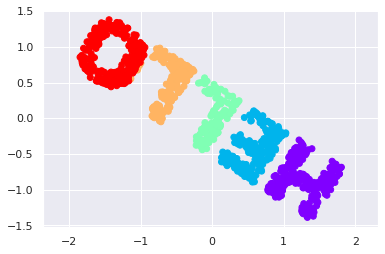

In [56]:
model = MDS(n_components=2, dissimilarity='precomputed') 
out = model.fit_transform(D2)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');


**Quiz 4**

In [57]:
import numpy as np

In [58]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA(n_components=2)

In [60]:
New_pca = pca.fit_transform(X)

In [61]:
New_pca

array([[-1.9337476 , -0.08154573],
       [-1.93360269,  0.01301875],
       [-1.93284845,  0.37256384],
       ...,
       [ 2.05704731, -0.03171414],
       [ 2.05815725, -0.1327384 ],
       [ 2.06207964, -0.15679672]])

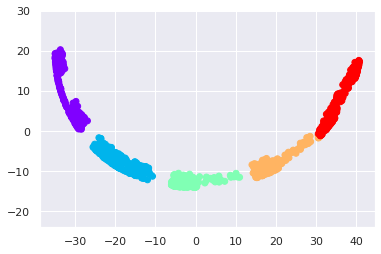

In [62]:
model =PCA(n_components=2)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

เกิดจากจุดที่ plot ออกมาไม่ได้กระจายเป็นตัวอักษรที่ต้องการ

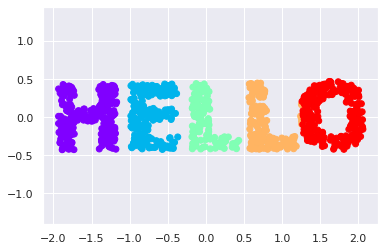

In [63]:
model = PCA(n_components=2)
out = model.fit_transform(X2)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

ที่ไม่โค้งงอ เหมือนรูปข้างบน เนื่องจากว่าได้หา PCA ที่มี eigen แกนกระจายและความแปรปวนมากที่สุด เพราะฉะนั้นไม่ว่าจะหมุนไปกี่องศา PCA ก็จะหมุนแกนกลับมาเป็นเหมือนเดิม